In [2]:
from pythonds.graphs import PriorityQueue, Graph, Vertex
from scipy.spatial import distance
import time
import os
import numpy as np
import scipy
    from skimage import io
class Djikstras(Graph):
    def __init__(self):
        super().__init__()
    def buildGraph(self,image_name):
        image = io.imread(image_name, as_gray=True)
        print(image)
        print(image.shape)
        self.columns = image.shape[1]
        for row in range(image.shape[0]-1):
            for column in range(image.shape[1]-1):
                name = (image.shape[1] * row) + column
                name_right = (image.shape[1] * row) + (column+1)
                name_down = (image.shape[1] * (row+1)) + column
                weight_right = max(image[row,column] - 50,1) + max(image[row,column+1] - 50, 1)
                weight_down = max(image[row,column]-50,1) + max(image[row+1,column] - 50, 1)
                self.addEdge(name,name_right,weight_right)
                self.addEdge(name_right,name,weight_right)
                self.addEdge(name,name_down,weight_down)
                self.addEdge(name_down,name,weight_down)
    def dijkstra(self,start):
        pq = PriorityQueue()
        start.setDistance(0)
        pq.buildHeap([(v.getDistance(),v) for v in self])
        while not pq.isEmpty():
            currentVert = pq.delMin()
#             print(currentVert.getId(),currentVert.getDistance())
            for nextVert in currentVert.getConnections():
                newDist = currentVert.getDistance() + currentVert.getWeight(nextVert)
                if newDist < nextVert.getDistance():
                    nextVert.setDistance(newDist)
                    nextVert.setPred(currentVert)
                    pq.decreaseKey(nextVert,newDist)  
    def distance_between_nodes(self, node1, node2):
        node1_id = node1.id
        node2_id = node2.id
        row1 = int(node1_id/self.columns)
        column1 = node1_id%self.columns
        row2 = int(node2_id/self.columns)
        column2 = node2_id%self.columns
        return distance.euclidean((row1,column1), (row2,column2))
    def astar(self,start,goal):
        pq = PriorityQueue()
        closed = []
        g_score_dict = {start: 0}
        pq.buildHeap([(self.distance_between_nodes(start,goal),start)])
        while not pq.isEmpty():
            currentVert = pq.delMin()
            closed.append(currentVert)
            if currentVert.id == goal.id:
                break
            for nextVert in currentVert.getConnections():
                tentative_gScore = g_score_dict[currentVert] + currentVert.getWeight(nextVert)                
                if nextVert not in g_score_dict or tentative_gScore < g_score_dict[nextVert]:                    
                    g_score_dict[nextVert] = tentative_gScore
                    fScore = tentative_gScore + self.distance_between_nodes(nextVert,goal)
                    nextVert.setDistance(fScore)
                    nextVert.setPred(currentVert)
                    pq.add((fScore, nextVert))
        return pq, closed
    def traverse(self,y):
        x = y
        pred_path = []
        while (x.getPred()):
            pred_path.append(x.getId())
            x = x.getPred()
        pred_path.append(x.getId())
        return pred_path

In [248]:
#part (a)
g1 = Djikstras()
g1.buildGraph('retina.png')
# for v in g:
#     for key in v.connectedTo:
#         print(v.id, key.id)
start_name = (image.shape[1] * 193) + 5
tic = time.time()
g1.dijkstra(g1.getVertex(start_name))
toc = time.time()
print("\n Time taken: {} seconds".format(toc-tic))

[[112 114 118 ...  86  87  83]
 [108 110 116 ...  86  84  77]
 [110 110 116 ...  79  84  84]
 ...
 [116 120 112 ...   0   0   0]
 [135 112 112 ...   0   0   0]
 [137 123 108 ...   0   0   0]]
(210, 189)

 Time taken: 114.15629482269287 seconds


In [264]:
#part (d)
g2 = Djikstras()
g2.buildGraph('retina.png')
start_name = (image.shape[1] * 193) + 5
end_name = (image.shape[1] * 14) + 104
tic = time.time()
pq, closed = g2.astar(g2.getVertex(start_name),g2.getVertex(end_name))
toc = time.time()
print("\n Time taken: {} seconds".format(toc-tic))

[[112 114 118 ...  86  87  83]
 [108 110 116 ...  86  84  77]
 [110 110 116 ...  79  84  84]
 ...
 [116 120 112 ...   0   0   0]
 [135 112 112 ...   0   0   0]
 [137 123 108 ...   0   0   0]]
(210, 189)

 Time taken: 1.077422857284546 seconds


Comparison between part (a) and part(d) time cost:-
Dijkstra’s algorithm takes longer time to compute the path in comparison to A* search

In [306]:
x_closed = tuple(int(v.id/image.shape[1]) for v in closed)
y_closed = tuple(v.id%image.shape[1] for v in closed)
# print(x_closed, y_closed)
open_nodes = [i[1] for i in pq.heapArray if i[1] != 0]
x_open = tuple(int(v.id/image.shape[1]) for v in open_nodes)
y_open = tuple(v.id%image.shape[1] for v in open_nodes)
# print(x_open, y_open)

In [307]:
end_name = (image.shape[1] * 14) + 104
pred_path1 = g1.traverse(g1.getVertex(end_name))
pred_path2 = g2.traverse(g2.getVertex(end_name))

In [308]:
rows1 = tuple(int(i/image.shape[1]) for i in pred_path1)
columns1 = tuple(i%image.shape[1] for i in pred_path1)
rows2 = tuple(int(i/image.shape[1]) for i in pred_path2)
columns2 = tuple(i%image.shape[1] for i in pred_path2)

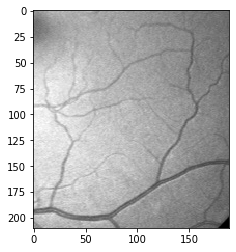

In [309]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap = 'gray')
plt.show()

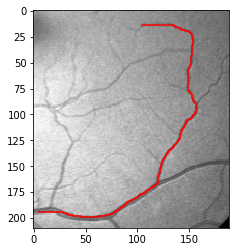

In [310]:
#part (a) graph
import matplotlib.pyplot as plt
plt.imshow(image, cmap = 'gray')
plt.plot(columns1,rows1, 'r')
plt.show()

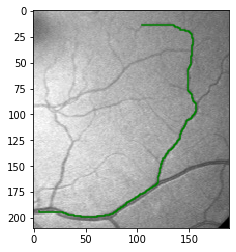

In [311]:
#part (d) graph
import matplotlib.pyplot as plt
plt.imshow(image, cmap = 'gray')
plt.plot(columns2,rows2, 'g')
plt.show()

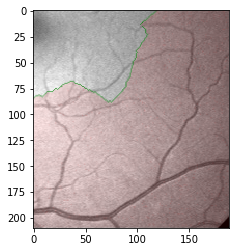

In [312]:
#part(e) open and closed nodes
import matplotlib.pyplot as plt
plt.imshow(image, cmap = 'gray')
plt.scatter(y_closed, x_closed, s=0.001, facecolors='none', edgecolors='r', marker= 'o')
plt.scatter(y_open, x_open, s=0.01, facecolors='none', edgecolors='g', marker= '^')
plt.show()

Part (c) - The above graph satisfies this condition:
h(x) ≤ d(x, y) + h(y) for every edge (x,y) of the graph
which proves that heuristic is also monotone with the graph

Part (b) - Since the heuristic is monotone, therefore the heuristic function is admissible too, meaning that it never overestimates the actual cost to get to the goal, A* is guaranteed to return a least-cost path from start to goal. 
The path is shown in the above diagram with the green lines.
